In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [33]:
dt = .1
b = 1
c = 1

def f(xn, yn, un):
    return xn+dt*yn, -dt*np.sin(xn) + (1-dt*b)*yn + c*un

def gen_data(x0, y0, n):
    x = np.zeros(n)
    y = np.zeros(n)
    x[0] = np.pi/4
    y[0] = -2
    
    x_noise = x.copy()
    y_noise = y.copy()

    for i in range(n-1):
        x[i+1], y[i+1] = f(x[i], y[i], 0) 
        x_noise[i+1], y_noise[i+1] = (x[i+1], y[i+1]) + np.random.normal(size=2, scale=0.1)
        
    return x, y, x_noise, y_noise

In [34]:
dt = .1
b = 1
c = 1

@jit(nopython=True)
def f_numba(xn, yn, un):
    return xn+dt*yn, -dt*np.sin(xn) + (1-dt*b)*yn + c*un

@jit(nopython=True)
def gen_data_numba(x0, y0, n):
    x = np.zeros(n)
    y = np.zeros(n)
    x[0] = np.pi/4
    y[0] = -2

    for i in range(n-1):
        x[i+1], y[i+1] = f_numba(x[i], y[i], 0)
        
    return x, y

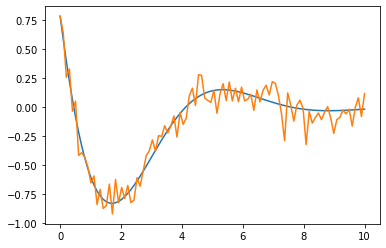

In [35]:
x, y, x_noise, _ = gen_data(np.pi/4, 1, 100)
plt.plot(np.linspace(0, dt*100, 100), x)
plt.plot(np.linspace(0, dt*100, 100), x_noise)

In [18]:
%timeit gen_data(np.pi/4, 1, 100)

198 µs ± 3.54 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
%timeit gen_data_numba(np.pi/4, 1, 1000)

6.31 µs ± 42.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
